In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets


In [2]:
# Load and split the data into train and test sets
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension (for CNN)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [4]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 50s 65ms/step - loss: 0.2124 - accuracy: 0.9351 - val_loss: 0.0721 - val_accuracy: 0.9780
Epoch 2/5
750/750 [==============================] - 48s 64ms/step - loss: 0.0569 - accuracy: 0.9826 - val_loss: 0.0589 - val_accuracy: 0.9825
Epoch 3/5
750/750 [==============================] - 51s 67ms/step - loss: 0.0401 - accuracy: 0.9871 - val_loss: 0.0429 - val_accuracy: 0.9871
Epoch 4/5
750/750 [==============================] - 49s 65ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0404 - val_accuracy: 0.9882
Epoch 5/5
750/750 [==============================] - 51s 68ms/step - loss: 0.0244 - accuracy: 0.9921 - val_loss: 0.0378 - val_accuracy: 0.9893


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 3s 10ms/step - loss: 0.0334 - accuracy: 0.9901
Test accuracy: 0.9901000261306763


Epoch 1/5
750/750 [==============================] - 55s 73ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0519 - val_accuracy: 0.9873
Epoch 2/5
750/750 [==============================] - 52s 69ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0473 - val_accuracy: 0.9868
Epoch 3/5
750/750 [==============================] - 53s 70ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0430 - val_accuracy: 0.9887
Epoch 4/5
750/750 [==============================] - 52s 70ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.0470 - val_accuracy: 0.9890
Epoch 5/5
750/750 [==============================] - 52s 69ms/step - loss: 0.0084 - accuracy: 0.9971 - val_loss: 0.0436 - val_accuracy: 0.9904


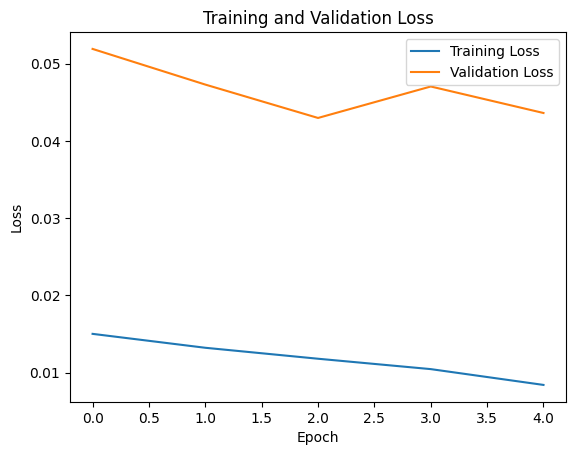

In [9]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
